<a href="https://colab.research.google.com/github/haganjonathan42/ReDI_project/blob/Visualisation/Copy_of_Redi_Project_(1)_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import chart_studio.plotly as py 
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go #this is used for making more customizable graphs 

# if you want plotly to work in your jupiter notbook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

#if y ou want everything to show run the command below
%matplotlib inline





In [ ]:

url1 = 'https://raw.githubusercontent.com/haganjonathan42/ReDI_project/main/airnb.csv'

In [ ]:
df1 = pd.read_csv(url1)

In [ ]:
df1.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   953 non-null    object
 1   Detail                  953 non-null    object
 2   Date                    953 non-null    object
 3   Price(in dollar)        953 non-null    object
 4   Offer price(in dollar)  166 non-null    object
 5   Review and rating       953 non-null    object
 6   Number of bed           953 non-null    object
dtypes: object(7)
memory usage: 52.2+ KB


Make sure tghat the formated right (the right data types e.g date should be formmated as date type. and price should be int or numeric)

Split the reviews into two colums so that we have reviews in one column and rating also in another column. 

Split the date into two coumns cos it is alos in range. one of the date will bethe first and the other the second date. 

check if all the listing are in the US or there other listing inluded, split the city into a different column.


Look at the unique values in the colmns. 

Mabe split the number of beds into two columns 


In [ ]:

df1['Rating'] = df1['Review and rating'].str.split(' ', expand=True)[0]
df1['Number_of_reviews'] = df1['Review and rating'].str.split(' ', expand=True)[1].str.strip('()')

df1.head(5)


,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,4.85,531
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,4.77,146
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,4.91,515
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,4.94,88
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,4.99,222


In [ ]:
df1['Date'].unique()

array(['Jun 11 - 16', 'Jun 6 - 11', 'Jul 9 - 14', 'Jun 4 - 9',
       'Jun 21 - 26', 'Jun 8 - 15', 'Jul 3 - 8', 'Jun 26 - Jul 1',
       'Sep 4 - 10', 'Jun 1 - 6', 'Sep 11 - 16', 'Sep 8 - 13',
       'Jun 18 - 23', 'Aug 20 - 25', 'Jun 9 - 14', 'Aug 31 - Sep 5',
       'Jul 23 - 28', 'Sep 1 - 6', 'Sep 3 - 8', 'Jun 17 - 22',
       'Jun 19 - 24', 'Jun 23 - 28', 'Jul 14 - 21', 'Jul 1 - 6',
       'Aug 12 - 17', 'Jul 12 - 17', 'Jun 4 - 11', 'Jun 3 - 8',
       'Jun 25 - 30', 'Jul 4 - 9', 'Jul 21 - 26', 'Aug 13 - 18',
       'Aug 25 - 30', 'Jul 11 - 16', 'Jun 6 - 13', 'Jun 12 - 17',
       'Jun 27 - Jul 4', 'Jun 4 - 10', 'Jul 25 - 31', 'Jun 2 - 7',
       'Jun 15 - 20', 'Aug 7 - 12', 'Aug 27 - Sep 1', 'Jun 25 - Jul 1',
       'Aug 2 - 7', 'Sep 4 - 9', 'Jun 5 - 12', 'Sep 5 - 10', 'Jun 5 - 10',
       'Jul 3 - 9', 'Jul 8 - 13', 'Jul 31 - Aug 5', 'Jul 17 - 22',
       'Aug 1 - 6', 'Aug 6 - 11', 'Jun 1 - 7', 'Jun 14 - 19',
       'Jun 10 - 15', 'Jul 29 - Aug 3', 'Jun 30 - Jul 5', 'Jul 22 - 27',

In [ ]:
df1[['Start Date', 'End Date']] = df1['Date'].str.split(' - ', expand=True)
df1.head(10)



,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,End Date
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,4.85,531,Jun 11,16
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,4.77,146,Jun 6,11
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,4.91,515,Jul 9,14
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,4.94,88,Jun 11,16
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,4.99,222,Jun 4,9
5,"Tiny home in Puerto Escondido, Mexico",Casa Tiny near Casa Wabi,Jun 21 - 26,261.00,148.00,4.84 (555),1 double bed,4.84,555,Jun 21,26
6,"Home in Saco, Maine, US",The Beach House. Oceanfront & Sunrise Views!,Jun 4 - 9,607.00,NaN,4.64 (90),2 queen beds,4.64,90,Jun 4,9
7,"Chalet in Grand Étang, Canada",• Cedar Peak • 2 Bedroom Barrier-Free Chalet,Jun 8 - 15,381.00,NaN,5.0 (48),2 beds,5.0,48,Jun 8,15
8,"Room in Mexico City, Mexico","Room in apartment, traditional neighborhood",Jul 3 - 8,29.00,NaN,4.84 (58),2 beds,4.84,58,Jul 3,8
9,"Tiny home in Sandy Valley, Nevada, US",Peacock Tiny House near Las Vegas,Jun 26 - Jul 1,154.00,NaN,4.92 (744),3 beds,4.92,744,Jun 26,Jul 1


In [ ]:
df1['Month'] = df1['Start Date'].str.split().str[0]


In [ ]:
df1['New End Date'] = df1['Month'] + ' ' + df1['End Date']

In [ ]:
df1.sample(100)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,End Date,Month,New End Date
165,"Condo in Rosarito, Mexico",LUXE & STYLISH/3BR/LAS OLAS CONDO/12TH FLR/ROS...,Jun 11 - 16,173.00,138.00,4.8 (207),4 beds,4.8,207,Jun 11,16,Jun,Jun 16
445,"Home in Castelmezzano, Italy",Casa del Mago - Castelmezzano,Jun 12 - 17,93.00,NaN,4.78 (100),3 beds,4.78,100,Jun 12,17,Jun,Jun 17
891,Resort in Panama City Beach,Beautiful ocean front condo Panama City Beach,May 1 - 6,143.00,NaN,4.78 (99),1 king bed,4.78,99,May 1,6,May,May 6
901,Home in Waxhaw,Fox Farms Little House,May 1 - 6,107.00,NaN,4.97 (430),2 beds,4.97,430,May 1,6,May,May 6
426,"Lighthouse in Ploemeur, France",Q3 BNB Premium Residence - The Engineering Tower,Jun 5 - 10,147.00,NaN,4.8 (10),1 sofa bed,4.8,10,Jun 5,10,Jun,Jun 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,"Room in Tebet, Indonesia",The LOJI @ Patra Kuningan # 3,Jun 30 - Jul 5,24.00,NaN,4.83 (69),2 double beds,4.83,69,Jun 30,Jul 5,Jun,Jun Jul 5
41,"Cabin in Topanga, California, US","Crystal Cabin, Restored Vintage Lodge in Topan...",Jun 3 - 8,225.00,NaN,4.94 (209),1 double bed,4.94,209,Jun 3,8,Jun,Jun 8
507,"Treehouse in Ubud, Indonesia","Promo Price! Magical Treehouse, Stunning Views.",Aug 23 - 30,280.00,NaN,4.78 (528),4 beds,4.78,528,Aug 23,30,Aug,Aug 30
510,"Cabin in Klungkung, Indonesia",Dreamy Cliffside Bamboo Villa with Pool and View,Nov 5 - 10,484.00,NaN,4.98 (58),1 bed,4.98,58,Nov 5,10,Nov,Nov 10


In [ ]:
for index, row in df1.iterrows():
    end_date = row['New End Date']
    if len(end_date.split()) > 2:
        end_date = ' '.join(end_date.split()[1:])
    # Update the 'New End Date' column in the DataFrame
    df1.at[index, 'New End Date'] = end_date
df1.sample(100)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,End Date,Month,New End Date
299,"Farm stay in Montepulciano, Italy",Rural Tuscany | Wine farm with pool | Terrarossa,Jun 14 - 20,148.00,NaN,4.33 (6),5 beds,4.33,6,Jun 14,20,Jun,Jun 20
123,"Cabin in Santa Marta, Colombia",The Dawn of Annapurna Cabin,Jul 29 - Aug 3,61.00,NaN,4.87 (188),1 queen bed,4.87,188,Jul 29,Aug 3,Jul,Aug 3
209,"Room in Key West, Florida, US",1-Private room/bbq/patio. 2 full bed 1 couch bed.,Jul 29 - Aug 3,258.00,NaN,4.83 (40),2 beds,4.83,40,Jul 29,Aug 3,Jul,Aug 3
597,"Room in Kabupaten Badung, Indonesia",Private room4 Legian/breakfast/close to Kuta b...,Jun 6 - 11,81.00,NaN,4.91 (34),1 bed,4.91,34,Jun 6,11,Jun,Jun 11
946,Condo in Treasure Island,Spectacular beach to bay views from this resort.,May 1 - 6,218.00,NaN,4.67 (148),1 bed,4.67,148,May 1,6,May,May 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Yurt in Rising Fawn,Cherry Blossom Yurt on Lookout Mountain,May 1 - 6,157.00,NaN,4.97 (666),1 king bed,4.97,666,May 1,6,May,May 6
514,"Treehouse in Kabupaten Buleleng, Indonesia",Seaside Designer Treehouse ~ Stunning Views ~ ...,Jun 13 - 18,121.00,NaN,4.75 (4),1 bed,4.75,4,Jun 13,18,Jun,Jun 18
13,"Barn in Vero Beach, Florida, US",Private Barn Studio at Pura Vida Florida Farm,Sep 11 - 16,111.00,NaN,4.95 (417),2 double beds,4.95,417,Sep 11,16,Sep,Sep 16
103,"Cabin in Gold Bar, Washington, US",New lux cabin w/mount index view,Jun 25 - 30,253.00,NaN,4.86 (7),2 beds,4.86,7,Jun 25,30,Jun,Jun 30


In [ ]:
df1['Start Date'] = pd.to_datetime(df1['Start Date'], format='%b %d')
df1['New End Date'] = pd.to_datetime(df1['New End Date'], format='%b %d')
df1['Date Difference'] = (df1['New End Date'] - df1['Start Date']).dt.days

In [ ]:
df1.head(5)


,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,End Date,Month,New End Date,Date Difference
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,4.85,531,1900-06-11,16,Jun,1900-06-16,5
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,4.77,146,1900-06-06,11,Jun,1900-06-11,5
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,4.91,515,1900-07-09,14,Jul,1900-07-14,5
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,4.94,88,1900-06-11,16,Jun,1900-06-16,5
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,4.99,222,1900-06-04,9,Jun,1900-06-09,5


In [ ]:
df1 = df1.drop(["End Date", "Month"], axis=1)

In [ ]:
df1.sample(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference
679,"Loft in Jelutong, Malaysia",#Maritime*3*The Rhythm of the Sea @ 日出无敌全海景,Jun 30 - Jul 5,98.00,NaN,4.56 (93),3 double beds,4.56,93,1900-06-30,1900-07-05,5
468,"Villa in Kecamatan Kuta Utara, Indonesia",Love Nest for honeymooner at best location,Sep 3 - 8,251.00,NaN,4.98 (87),1 double bed,4.98,87,1900-09-03,1900-09-08,5
571,"Apartment in Melaka, Malaysia",Yuma • Atlantis Melaka/3BR 8Pax WiFi Balcony S...,Jun 18 - 23,40.00,NaN,4.43 (7),2 king beds,4.43,7,1900-06-18,1900-06-23,5
858,Apartment in Laguna Beach,Laguna Beach Charming Unit- Location/Value,May 1 - 6,385.00,NaN,4.96 (384),3 beds,4.96,384,1900-05-01,1900-05-06,5
887,Condo in Fernandina Beach,"Amelia Island, 2 bedroom beach front condo",May 1 - 6,327.00,NaN,4.92 (147),2 beds,4.92,147,1900-05-01,1900-05-06,5


In [ ]:
# df1['City'] = df1['Title'].str.split(' in |,').str[1]

# df1.sample(20)



In [ ]:
# Split the 'Title' column into 'Place', 'City', and 'Country' columns
df1[['Facility', 'others']] = df1['Title'].str.split(' in ', n= 2, expand=True)
df1.sample(2)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,others
96,"Boat in Key West, Florida, US",Cozy Houseboat “Wild One”,Jun 11 - 16,233.00,NaN,5.0 (4),2 beds,5.0,4,1900-06-11,1900-06-16,5,Boat,"Key West, Florida, US"
517,"Villa in Bacnotan, La Union, Philippines","Private Modern Beachfront Villa: Pool, Sunset ...",Jun 28 - Jul 3,628.00,NaN,5.0 (15),9 beds,5.0,15,1900-06-28,1900-07-03,5,Villa,"Bacnotan, La Union, Philippines"


In [ ]:
# Assuming you have the table data in a DataFrame called 'df1'

# # Split the 'Others' column 
# split_values = df1['others'].str.split(',')

# df1['City'] = split_values.str[0]

# df1.sample(5)



df1['City'] = df1['others'].str.split(',').str[0]

df1.sample(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,others,City
312,"Room in Torreglia, Italy",Country House,Jun 11 - 16,69.00,NaN,4.94 (84),3 beds,4.94,84,1900-06-11,1900-06-16,5,Room,"Torreglia, Italy",Torreglia
320,"Cabin in Filipstad N, Sweden",FredrikLars farm at Nordmarksberg Manor,Jun 24 - 30,44.00,NaN,4.98 (46),2 single beds,4.98,46,1900-06-24,1900-06-30,6,Cabin,"Filipstad N, Sweden",Filipstad N
282,"Home in Miazzina, Italy","Baita Vrei (2)""Titta"" - Hut Lago Maggiore",Jun 4 - 9,61.00,NaN,4.84 (63),2 beds,4.84,63,1900-06-04,1900-06-09,5,Home,"Miazzina, Italy",Miazzina
588,"Apartment in Phuket, Thailand",Cozy Place near Shopping Center,Jun 20 - 25,35.00,NaN,4.96 (237),2 king beds,4.96,237,1900-06-20,1900-06-25,5,Apartment,"Phuket, Thailand",Phuket
491,"Apartment in 清迈, Thailand",清迈 The Astra Condo长康路无边泳池豪华公寓古城夜市边Chang Khlan ...,Jun 12 - 17,33.00,809.00,4.68 (158),1 queen bed,4.68,158,1900-06-12,1900-06-17,5,Apartment,"清迈, Thailand",清迈


In [ ]:
# # Check the number of words after splitting
# df1['Country'] = split_values.apply(lambda x: x[-1].strip() if len(x) > 1 else None)
# df1.sample(50)


# Check the number of words after splitting
df1['Country'] = df1['others'].str.split(',').apply(lambda x: x[-1].strip() if len(x) > 1 else None)
df1.sample(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,others,City,Country
320,"Cabin in Filipstad N, Sweden",FredrikLars farm at Nordmarksberg Manor,Jun 24 - 30,44.00,NaN,4.98 (46),2 single beds,4.98,46,1900-06-24,1900-06-30,6,Cabin,"Filipstad N, Sweden",Filipstad N,Sweden
236,"Apartment in Cancún, Mexico",Cancun Suites (Standard Room),Jul 2 - 8,81.00,140.00,4.47 (192),3 beds,4.47,192,1900-07-02,1900-07-08,6,Apartment,"Cancún, Mexico",Cancún,Mexico
371,"Cabin in Millbrook, UK",Romantic Ocean View Couples Retreat Cornwall,Jun 10 - 15,357.00,NaN,5.0 (61),2 beds,5.0,61,1900-06-10,1900-06-15,5,Cabin,"Millbrook, UK",Millbrook,UK
276,"Apartment in Calpe, Spain",Apartment Caribe - PlusHolidays,Jun 1 - 6,80.00,NaN,3.67 (3),2 double beds,3.67,3,1900-06-01,1900-06-06,5,Apartment,"Calpe, Spain",Calpe,Spain
87,"Tiny home in Komoka, Canada",The Cabin at Fernwood Hills,Jun 11 - 16,112.00,NaN,4.9 (597),1 king bed,4.9,597,1900-06-11,1900-06-16,5,Tiny home,"Komoka, Canada",Komoka,Canada


In [ ]:
df1['Country'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
702 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


In [ ]:
df1.isnull().sum()

Title                       0
Detail                      0
Date                        0
Price(in dollar)            0
Offer price(in dollar)    787
Review and rating           0
Number of bed               0
Rating                      0
Number_of_reviews          22
Start Date                  0
New End Date                0
Date Difference             0
Facility                    0
others                      0
City                        0
Country                   251
dtype: int64

In [ ]:
missing_country = df1[df1['Country'].isnull()]
missing_country.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,others,City,Country
702,Tiny home in Millersburg,Forest Haven - Otium,May 1 - 6,224.00,NaN,4.85 (218),1 queen bed,4.85,218,1900-05-01,1900-05-06,5,Tiny home,Millersburg,Millersburg,None
703,Treehouse in Crane Hill,WANDERLUST TREEHOUSE Book an experience!,May 1 - 6,402.00,NaN,4.99 (271),1 queen bed,4.99,271,1900-05-01,1900-05-06,5,Treehouse,Crane Hill,Crane Hill,None
704,Home in Telluride,Architectural Masterpiece | Best View in Tellu...,May 1 - 6,732.00,NaN,4.97 (76),5 beds,4.97,76,1900-05-01,1900-05-06,5,Home,Telluride,Telluride,None
705,Cabin in West Farmington,The Triangle: A-Frame Cabin for your city retreat,May 1 - 6,123.00,NaN,4.91 (515),4 beds,4.91,515,1900-05-01,1900-05-06,5,Cabin,West Farmington,West Farmington,None
706,Cabin in Crosby,Cozy Louise Cabin - Direct Cuyuna MTB Access/S...,May 1 - 6,225.00,NaN,5.0 (18),2 queen beds,5.0,18,1900-05-01,1900-05-06,5,Cabin,Crosby,Crosby,None


In [ ]:
# df1['State'] = df1['others'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)
df1['State'] = df1['others'].apply(lambda x: x.split(',')[-2].strip() if ',' in x else None)
df1.sample(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,others,City,Country,State
18,"Treehouse in Travelers Rest, South Carolina, US",The Forestry House - A modern luxury treehouse.,Aug 20 - 25,282.00,417.00,New,1 bed,New,None,1900-08-20,1900-08-25,5,Treehouse,"Travelers Rest, South Carolina, US",Travelers Rest,US,South Carolina
351,"Cabin in Walpole, UK","Peaceful, wooden garden cabin",Jul 9 - 14,93.00,NaN,4.91 (255),1 sofa bed,4.91,255,1900-07-09,1900-07-14,5,Cabin,"Walpole, UK",Walpole,UK,Walpole
306,"Room in La Zubia, Spain",Alhambra Trails 2,Jun 6 - 13,94.00,84.00,4.78 (36),2 beds,4.78,36,1900-06-06,1900-06-13,7,Room,"La Zubia, Spain",La Zubia,Spain,La Zubia
177,"Farm stay in Saint Marys, Canada",Cozy Farm Stay Getaway,Jun 11 - 16,99.00,NaN,4.86 (183),2 queen beds,4.86,183,1900-06-11,1900-06-16,5,Farm stay,"Saint Marys, Canada",Saint Marys,Canada,Saint Marys
30,"Cabin in Bryson City, North Carolina, US",Secluded View! A-Frame Hot Tub and Fire Pit,Jun 19 - 24,354.00,NaN,4.95 (20),1 queen bed,4.95,20,1900-06-19,1900-06-24,5,Cabin,"Bryson City, North Carolina, US",Bryson City,US,North Carolina


In [ ]:


# Check if 'State' and 'City' columns are the same
same_location = df1['State'] == df1['City']

# Replace 'State' column with 'None' for matching locations
df1.loc[same_location, 'State'] = 'None'

df1.sample(5)


,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,others,City,Country,State
581,"Villa in Ubud, Indonesia",Ceylon Villas 2 - 2BR Villa! 5 mins to Ubud 🌴,Oct 12 - 17,157.00,NaN,4.88 (112),2 king beds,4.88,112,1900-10-12,1900-10-17,5,Villa,"Ubud, Indonesia",Ubud,Indonesia,None
748,Home in Wilmington,Atlantic Coast Dome Home Across from Sound w/ ...,May 19 - 24,244.00,NaN,4.96 (47),2 beds,4.96,47,1900-05-19,1900-05-24,5,Home,Wilmington,Wilmington,None,None
664,"Villa in Pemuteran, Indonesia","Villa Arun, Sumberkima Hill",Aug 21 - 26,262.00,NaN,4.88 (57),1 queen bed,4.88,57,1900-08-21,1900-08-26,5,Villa,"Pemuteran, Indonesia",Pemuteran,Indonesia,None
811,Condo in Panama City Beach,300 STEPS TO THE BEACH-BEST 1 BEDROOM DEAL IN ...,May 1 - 6,169.00,NaN,4.68 (57),2 beds,4.68,57,1900-05-01,1900-05-06,5,Condo,Panama City Beach,Panama City Beach,None,None
80,"Condo in Lahaina, Hawaii, US",Noelani-My Perfect Stays Special: Jun 9-16 $189,Jun 9 - 14,302.00,NaN,4.82 (71),1 king bed,4.82,71,1900-06-09,1900-06-14,5,Condo,"Lahaina, Hawaii, US",Lahaina,US,Hawaii


In [ ]:
df1 = df1.drop(["others"], axis=1)
df1.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,4.85,531,1900-06-11,1900-06-16,5,Chalet,Skykomish,US,Washington
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,4.77,146,1900-06-06,1900-06-11,5,Cabin,Hancock,US,New York
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,4.91,515,1900-07-09,1900-07-14,5,Cabin,West Farmington,US,Ohio
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,4.94,88,1900-06-11,1900-06-16,5,Home,Blue Ridge,US,Georgia
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,4.99,222,1900-06-04,1900-06-09,5,Treehouse,Grandview,US,Texas


In [ ]:
df1['Ocupancy'] = df1['Number of bed'].str.split().str[0]
df1.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,4.85,531,1900-06-11,1900-06-16,5,Chalet,Skykomish,US,Washington,4
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,4.77,146,1900-06-06,1900-06-11,5,Cabin,Hancock,US,New York,4
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,4.91,515,1900-07-09,1900-07-14,5,Cabin,West Farmington,US,Ohio,4
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,4.94,88,1900-06-11,1900-06-16,5,Home,Blue Ridge,US,Georgia,5
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,4.99,222,1900-06-04,1900-06-09,5,Treehouse,Grandview,US,Texas,1


In [ ]:
missing_num_reviews = df1[df1['Number_of_reviews'].isnull()]
missing_num_reviews

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
18,"Treehouse in Travelers Rest, South Carolina, US",The Forestry House - A modern luxury treehouse.,Aug 20 - 25,282.00,417.00,New,1 bed,New,None,1900-08-20,1900-08-25,5,Treehouse,Travelers Rest,US,South Carolina,1
71,"Cabin in Tulum, Mexico",Jungle Lodge at Nahouse in Tulum,Jun 1 - 6,109.00,NaN,None,1 king bed,None,None,1900-06-01,1900-06-06,5,Cabin,Tulum,Mexico,None,1
98,"Guesthouse in Destin, Florida, US",New Carriage House * 1 Block to Beach * King Bed!,Aug 13 - 18,231.00,NaN,New,1 king bed,New,None,1900-08-13,1900-08-18,5,Guesthouse,Destin,US,Florida,1
100,"Home in Bellingham, Washington, US",Bellingham A-Frame - Hot tub & Firepit,Jun 11 - 16,232.00,NaN,New,2 beds,New,None,1900-06-11,1900-06-16,5,Home,Bellingham,US,Washington,2
101,"Apartment in San Juan, Puerto Rico","Villa Bohème 3, 1BR with Patio",Jul 8 - 13,115.00,NaN,New,1 bed,New,None,1900-07-08,1900-07-13,5,Apartment,San Juan,Puerto Rico,None,1
111,"Treehouse in Wardensville, West Virginia, US",Eagles Nest Treehouse w/Hot tub!,Jun 4 - 10,244.00,63.00,New,3 beds,New,None,1900-06-04,1900-06-10,6,Treehouse,Wardensville,US,West Virginia,3
170,"Cabin in Georgetown, Maine, US","Modern Cabin On Pond, AC & Porch",Jun 2 - 7,231.00,NaN,New,1 king bed,New,None,1900-06-02,1900-06-07,5,Cabin,Georgetown,US,Maine,1
204,"Home in Manzanita, Oregon, US","Near Ocean, BBQ, Dog OK, Cute Manzanita Beach",Jun 1 - 6,147.00,NaN,New,2 queen beds,New,None,1900-06-01,1900-06-06,5,Home,Manzanita,US,Oregon,2
255,"Cabin in Hvanneyri, Iceland",Mirror House Iceland,Sep 1 - 6,735.00,75.00,New,1 bed,New,None,1900-09-01,1900-09-06,5,Cabin,Hvanneyri,Iceland,None,1
323,"Camper/RV in Mayen, Germany","Quaint ""Petra Lustig"" construction car",Jun 24 - 30,48.00,NaN,None,2 single beds,None,None,1900-06-24,1900-06-30,6,Camper/RV,Mayen,Germany,None,2


In [ ]:
df1['Number_of_reviews'] = df1['Number_of_reviews'].fillna(0)
df1.head()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,4.85,531,1900-06-11,1900-06-16,5,Chalet,Skykomish,US,Washington,4
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,4.77,146,1900-06-06,1900-06-11,5,Cabin,Hancock,US,New York,4
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,4.91,515,1900-07-09,1900-07-14,5,Cabin,West Farmington,US,Ohio,4
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,4.94,88,1900-06-11,1900-06-16,5,Home,Blue Ridge,US,Georgia,5
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,4.99,222,1900-06-04,1900-06-09,5,Treehouse,Grandview,US,Texas,1


In [ ]:
df1.isnull().sum()

Title                       0
Detail                      0
Date                        0
Price(in dollar)            0
Offer price(in dollar)    787
Review and rating           0
Number of bed               0
Rating                      0
Number_of_reviews           0
Start Date                  0
New End Date                0
Date Difference             0
Facility                    0
City                        0
Country                   251
State                     251
Ocupancy                    0
dtype: int64

In [ ]:
missing_state = df1[df1['State'].isnull()]
missing_state.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
702,Tiny home in Millersburg,Forest Haven - Otium,May 1 - 6,224.00,NaN,4.85 (218),1 queen bed,4.85,218,1900-05-01,1900-05-06,5,Tiny home,Millersburg,None,None,1
703,Treehouse in Crane Hill,WANDERLUST TREEHOUSE Book an experience!,May 1 - 6,402.00,NaN,4.99 (271),1 queen bed,4.99,271,1900-05-01,1900-05-06,5,Treehouse,Crane Hill,None,None,1
704,Home in Telluride,Architectural Masterpiece | Best View in Tellu...,May 1 - 6,732.00,NaN,4.97 (76),5 beds,4.97,76,1900-05-01,1900-05-06,5,Home,Telluride,None,None,5
705,Cabin in West Farmington,The Triangle: A-Frame Cabin for your city retreat,May 1 - 6,123.00,NaN,4.91 (515),4 beds,4.91,515,1900-05-01,1900-05-06,5,Cabin,West Farmington,None,None,4
706,Cabin in Crosby,Cozy Louise Cabin - Direct Cuyuna MTB Access/S...,May 1 - 6,225.00,NaN,5.0 (18),2 queen beds,5.0,18,1900-05-01,1900-05-06,5,Cabin,Crosby,None,None,2


In [ ]:
df1.loc[df1['Rating'] == 'New', 'Rating'] = np.nan
df1.sample(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
554,"Home in Kecamatan Ubud, Indonesia",PROMO! Luxury Villa Escape in Ubud 2 BR,Sep 1 - 6,306.00,NaN,5.0 (4),2 beds,5.0,4,1900-09-01,1900-09-06,5,Home,Kecamatan Ubud,Indonesia,None,2
398,"Home in Chalkida, Greece",Seaside & Garden Single family home,Jun 8 - 13,104.00,124.00,4.94 (33),2 beds,4.94,33,1900-06-08,1900-06-13,5,Home,Chalkida,Greece,None,2
768,Townhouse in Kissimmee,Brand New 3 beds at Solara Resort,May 1 - 6,155.00,NaN,4.83 (12),2 beds,4.83,12,1900-05-01,1900-05-06,5,Townhouse,Kissimmee,None,None,2
36,"Condo in Puerto Vallarta, Mexico",Buddha Loft in Romantic Zone of Puerto Vallarta,Jul 12 - 17,112.00,146.00,4.85 (175),1 bed,4.85,175,1900-07-12,1900-07-17,5,Condo,Puerto Vallarta,Mexico,None,1
797,Villa in Miramar,Modern Retreat with King Bed-Heated Pool-and G...,May 1 - 6,494.00,NaN,5.0 (33),6 beds,5.0,33,1900-05-01,1900-05-06,5,Villa,Miramar,None,None,6


In [ ]:
missing_rating = df1[df1['Rating'].isnull()]
missing_rating.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
18,"Treehouse in Travelers Rest, South Carolina, US",The Forestry House - A modern luxury treehouse.,Aug 20 - 25,282.00,417.00,New,1 bed,NaN,0,1900-08-20,1900-08-25,5,Treehouse,Travelers Rest,US,South Carolina,1
98,"Guesthouse in Destin, Florida, US",New Carriage House * 1 Block to Beach * King Bed!,Aug 13 - 18,231.00,NaN,New,1 king bed,NaN,0,1900-08-13,1900-08-18,5,Guesthouse,Destin,US,Florida,1
100,"Home in Bellingham, Washington, US",Bellingham A-Frame - Hot tub & Firepit,Jun 11 - 16,232.00,NaN,New,2 beds,NaN,0,1900-06-11,1900-06-16,5,Home,Bellingham,US,Washington,2
101,"Apartment in San Juan, Puerto Rico","Villa Bohème 3, 1BR with Patio",Jul 8 - 13,115.00,NaN,New,1 bed,NaN,0,1900-07-08,1900-07-13,5,Apartment,San Juan,Puerto Rico,None,1
111,"Treehouse in Wardensville, West Virginia, US",Eagles Nest Treehouse w/Hot tub!,Jun 4 - 10,244.00,63.00,New,3 beds,NaN,0,1900-06-04,1900-06-10,6,Treehouse,Wardensville,US,West Virginia,3


In [ ]:
df1['Price(in dollar)'] = df1['Price(in dollar)'].str.replace(',','').astype(float)

In [ ]:
df2 = df1.drop(['Date','Offer price(in dollar)','Review and rating'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              953 non-null    object        
 1   Detail             953 non-null    object        
 2   Price(in dollar)   953 non-null    float64       
 3   Number of bed      953 non-null    object        
 4   Rating             937 non-null    object        
 5   Number_of_reviews  953 non-null    object        
 6   Start Date         953 non-null    datetime64[ns]
 7   New End Date       953 non-null    datetime64[ns]
 8   Date Difference    953 non-null    int64         
 9   Facility           953 non-null    object        
 10  City               953 non-null    object        
 11  Country            702 non-null    object        
 12  State              702 non-null    object        
 13  Ocupancy           953 non-null    object        
dtypes: datetim

In [ ]:
df2['Rating'] = df2['Rating'].replace('None', np.nan).astype(float)

In [ ]:
df2[['Number_of_reviews','Ocupancy']] = df2[['Number_of_reviews','Ocupancy']].astype(int)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              953 non-null    object        
 1   Detail             953 non-null    object        
 2   Price(in dollar)   953 non-null    float64       
 3   Number of bed      953 non-null    object        
 4   Rating             931 non-null    float64       
 5   Number_of_reviews  953 non-null    int64         
 6   Start Date         953 non-null    datetime64[ns]
 7   New End Date       953 non-null    datetime64[ns]
 8   Date Difference    953 non-null    int64         
 9   Facility           953 non-null    object        
 10  City               953 non-null    object        
 11  Country            702 non-null    object        
 12  State              702 non-null    object        
 13  Ocupancy           953 non-null    int64         
dtypes: datetim

In [ ]:
df2.sample(5)

,Title,Detail,Price(in dollar),Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
499,"Villa in Langkawi, Malaysia",Alamanda Tropical Wooden Villa - Pool View,97.0,2 beds,4.87,196,1900-06-15,1900-06-20,5,Villa,Langkawi,Malaysia,None,2
326,"Castle in Winningen, Germany",Magazine - Oskar Schwebel -,136.0,4 beds,4.66,277,1900-06-11,1900-06-16,5,Castle,Winningen,Germany,None,4
414,"Home in Chalkida, Greece",Seaside & Garden Single family home,104.0,2 beds,4.94,33,1900-06-08,1900-06-13,5,Home,Chalkida,Greece,None,2
61,"Home in Tulum, Mexico","Heaven Lodge, entire house surrounded by nature",128.0,1 king bed,4.86,155,1900-06-02,1900-06-07,5,Home,Tulum,Mexico,None,1
452,"Hut in Ubud, Indonesia",Bali Bamboo House | Rescape Ubud - Relief Villa,171.0,1 bed,4.79,164,1900-10-29,1900-11-03,5,Hut,Ubud,Indonesia,None,1


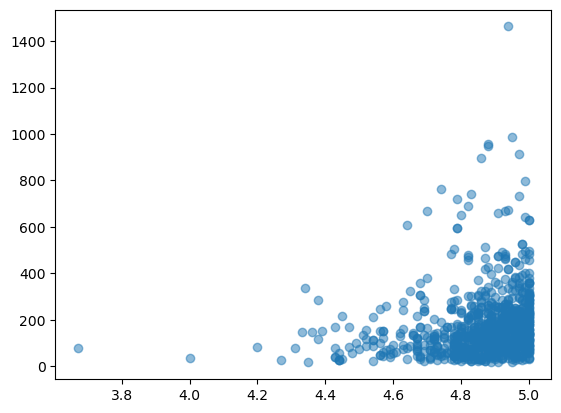

In [ ]:
plt.scatter (df2 ['Rating'], df2 ['Price(in dollar)'], alpha=0.5)

plt.show ()

In [ ]:
df2['Rating'] = df2['Rating'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              953 non-null    object        
 1   Detail             953 non-null    object        
 2   Price(in dollar)   953 non-null    float64       
 3   Number of bed      953 non-null    object        
 4   Rating             931 non-null    float64       
 5   Number_of_reviews  953 non-null    int64         
 6   Start Date         953 non-null    datetime64[ns]
 7   New End Date       953 non-null    datetime64[ns]
 8   Date Difference    953 non-null    int64         
 9   Facility           953 non-null    object        
 10  City               953 non-null    object        
 11  Country            702 non-null    object        
 12  State              702 non-null    object        
 13  Ocupancy           953 non-null    int64         
dtypes: datetim

In [ ]:
df2.head(2)

,Title,Detail,Price(in dollar),Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,306.0,4 beds,4.85,531,1900-06-11,1900-06-16,5,Chalet,Skykomish,US,Washington,4
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,485.0,4 beds,4.77,146,1900-06-06,1900-06-11,5,Cabin,Hancock,US,New York,4


In [ ]:
fig = px.histogram(
    df2['Price(in dollar)'], nbins = 20, 
    labels = {'value': 'Price in Dollar'}, #The lebels that will show on the graph the key is the old value and the value is the new value
    title = 'Price Distribution', 
    marginal = 'violin', 
    color_discrete_sequence = [ 'green' ]
    
 
)


fig                                                                                                                                                     


In [ ]:
fig = px.histogram(
    df2['Ocupancy'], nbins = 20, 
    labels = {'value': 'Price in Dollar'}, #The lebels that will show on the graph the key is the old value and the value is the new value
    title = 'Price Distribution', 
    marginal = 'violin', 
    color_discrete_sequence = [ 'green' ]
    
 
)


fig  

In [ ]:

df3 = df2[(df2['Ocupancy'] < 10) & (df2['Price(in dollar)'] < 1200)]


In [ ]:
fig = px.histogram(
    df3['Ocupancy'], nbins = 10, 
    labels = {'value': 'Occupancy'}, #The lebels that will show on the graph the key is the old value and the value is the new value
    title = 'Occupancy Distribution', 
#     marginal = 'violin', 
    color_discrete_sequence = [ 'green' ]
    
 
)


fig  

In [ ]:
fig = px.histogram(
    df3['Price(in dollar)'], nbins = 10, 
    labels = {'value': 'Price in Dollar'}, #The lebels that will show on the graph the key is the old value and the value is the new value
    title = 'Price Distribution', 
#     marginal = 'violin', 
    color_discrete_sequence = [ 'green' ]
    
 
)


fig    

In [ ]:
df3.head(2)


,Title,Detail,Price(in dollar),Number of bed,Rating,Number_of_reviews,Start Date,New End Date,Date Difference,Facility,City,Country,State,Ocupancy
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,306.0,4 beds,4.85,531,1900-06-11,1900-06-16,5,Chalet,Skykomish,US,Washington,4
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,485.0,4 beds,4.77,146,1900-06-06,1900-06-11,5,Cabin,Hancock,US,New York,4


In [ ]:
fig = px.bar(
    df3,
    y = df3['Ocupancy'],
    x = df3['Facility'],
    color = 'Facility'
    
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'}
)

fig.show()

In [ ]:
value_counts = df3['Ocupancy'].value_counts()

In [ ]:

avg_rating = df3.groupby('Ocupancy')['Rating'].agg(['mean', 'median', 'sum', 'size']).reset_index()

In [ ]:
avg_rating

,Ocupancy,mean,median,sum,size
0,1,4.866083,4.890,1751.79,369
1,2,4.858202,4.890,1540.05,325
2,3,4.855625,4.900,621.52,131
3,4,4.858243,4.880,359.51,75
4,5,4.865000,4.925,87.57,19
5,6,4.895882,4.920,83.23,17
6,7,4.933333,4.930,14.80,3
7,8,4.912500,4.940,19.65,4
8,9,4.880000,4.920,19.52,4


In [ ]:
avg_ocupancy

Ocupancy  Title                                     Detail                                              Price(in dollar)  Number of bed  Rating  Number_of_reviews  Start Date  New End Date  Date Difference  Facility   City              Country      State   
1         Villa in Kathu, Thailand                  Tiny Poolvilla in the heart of Phuket               119.0             1 king bed     5.00    98                 1900-07-25  1900-07-30    5                Villa      Kathu             Thailand     None        2
          Room in Kabupaten Badung, Indonesia       Private room4 Legian/breakfast/close to Kuta beach  81.0              1 bed          4.91    34                 1900-06-06  1900-06-11    5                Room       Kabupaten Badung  Indonesia    None        2
          Apartment in Quận 4, Vietnam              DANNY’s HIGH VIEW STUDIO near District1 Ben Thanh!  44.0              1 queen bed    4.78    167                1900-06-03  1900-06-08    5                Apartment